In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [2]:
data = pd.read_csv('imdb_top_2000_movies.csv')
data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [4]:
data.isnull().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [5]:
data.isna().sum()

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
dtype: int64

In [6]:

data = data.dropna()
data.isnull().sum()


Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data.loc[:, 'Director_encoded'] = label_encoder.fit_transform(data['Director'])
data.loc[:, 'Cast_encoded'] = label_encoder.fit_transform(data['Cast'])
data.loc[:, 'ReleaseYear_encoded'] = label_encoder.fit_transform(data['Release Year'])

data.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,Director_encoded,Cast_encoded,ReleaseYear_encoded
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M,206,513,35
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M,206,9,37
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M,673,199,43
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M,150,619,25
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M,770,648,40


In [8]:
# fitur = Release year, duration, genre, direactor, cast

x = data.drop(columns = ['Movie Name', 'IMDB Rating', 'Votes', 'Metascore', 'Gross', 'Director', 'Cast', 'Genre', 'Release Year'], axis=1)
y = data['Metascore']

print(x)
print(y)

      Duration  Director_encoded  Cast_encoded  ReleaseYear_encoded
0          175               206           513                   35
1          202               206             9                   37
2          124               673           199                   43
3          218               150           619                   25
5          138               770           648                   40
...        ...               ...           ...                  ...
1995       105               312           227                   72
1996       101               516           205                   89
1997       108               769           523                   72
1998        90               527           541                   72
1999        89               351           357                   71

[1870 rows x 4 columns]
0       100.0
1        90.0
2        86.0
3       100.0
5        90.0
        ...  
1995     64.0
1996     36.0
1997     66.0
1998     63.0
1999     53.0
Name:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1496, 4)
(374, 4)
(1496,)
(374,)


In [10]:
model_3D = LinearRegression()
model_3D.fit(x_train, y_train)

LinearRegression()

In [11]:
y_test_pred = model_3D.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 247.83453953351798
R² Score: 0.18633965286690346


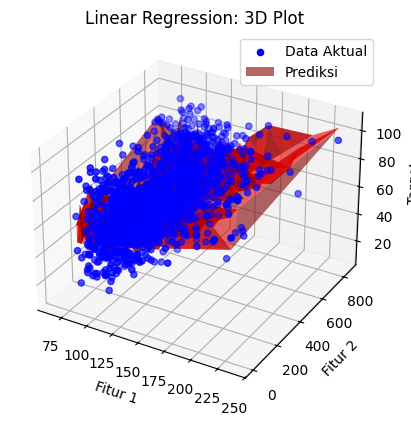

In [12]:
y_pred = model_3D.predict(x_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], y_train, color="blue", label="Data Aktual")
ax.plot_trisurf(x_train.iloc[:, 0], x_train.iloc[:, 1], y_pred, color="red", alpha=0.6, label="Prediksi")

ax.set_title("Linear Regression: 3D Plot")
ax.set_xlabel("Fitur 1")
ax.set_ylabel("Fitur 2")
ax.set_zlabel("Target")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

sns.pairplot(data, diag_kind="kde", hue="Target")

In [15]:
fig = px.scatter_3d(data, x='Duration', y='Director_encoded', z='Cast_encoded', 
                    color='Metascore', size='Metascore',
                    title='3D Scatter Plot: Duration, Director_encoded, Cast_encoded vs Metascore')
fig.show()

Mean Squared Error (MSE): 316.9770718827424
R² Score: 0.0003235278465028024


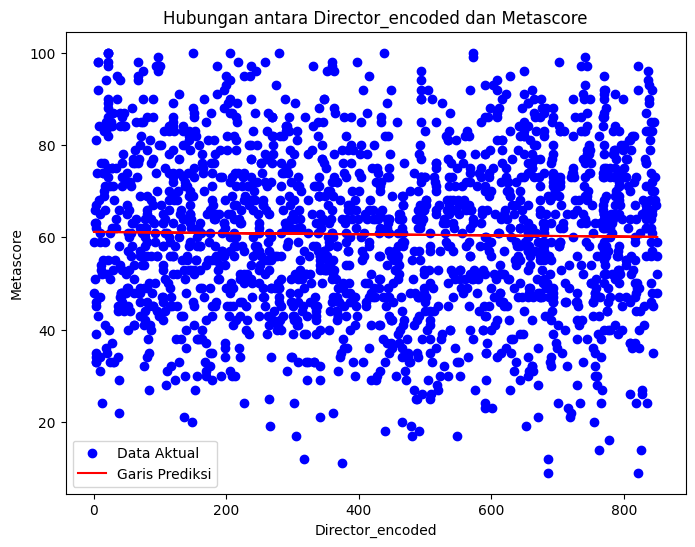

Mean Squared Error (MSE): 316.97817341806444
R² Score: 0.0003200538446196388


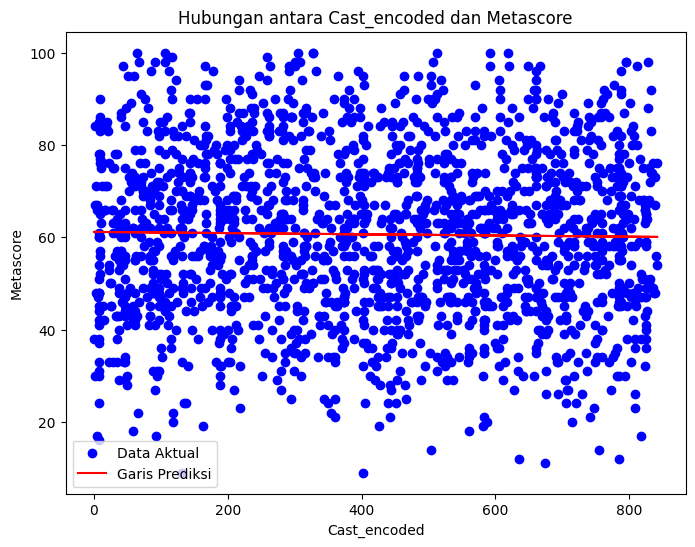

Mean Squared Error (MSE): 265.78499387433993
R² Score: 0.1617721639944747


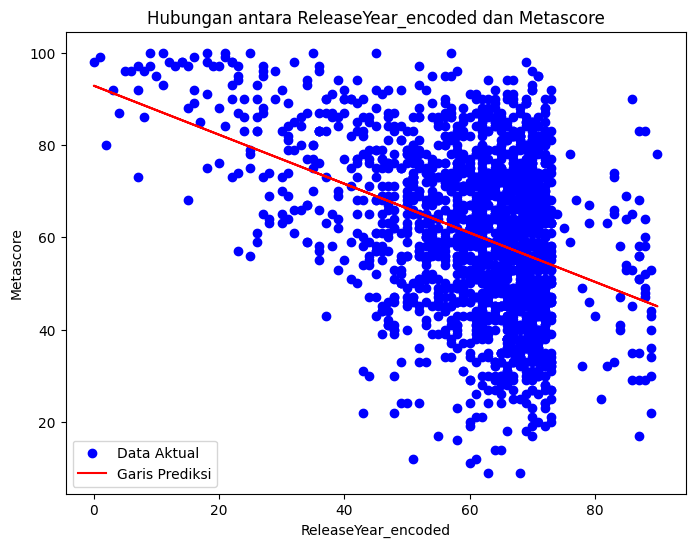

Mean Squared Error (MSE): 297.0764713993245
R² Score: 0.06308567643609775


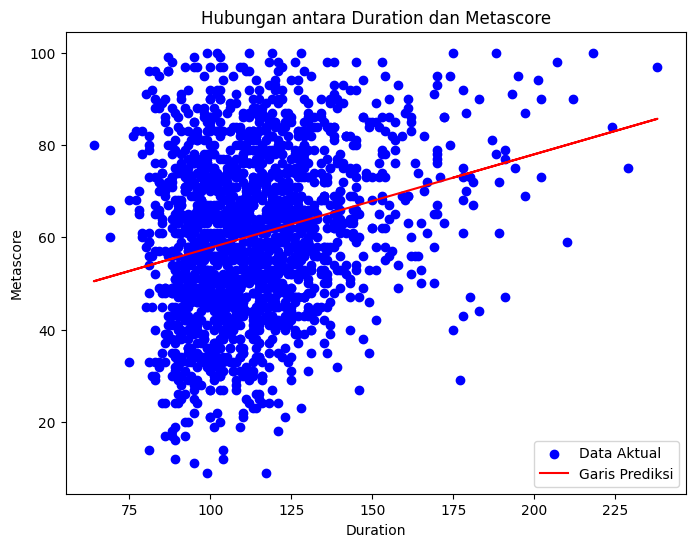

In [14]:
features = ['Director_encoded', 'Cast_encoded', 'ReleaseYear_encoded', 'Duration']
for feature in features:
    y = data['Metascore']
    featured = data[feature]
    featured = featured.values.reshape(-1, 1)
    model_2D = LinearRegression()
    model_2D.fit(featured, y)
    x_data = featured
    y_pred = model_2D.predict(x_data)
    plt.figure(figsize=(8, 6))
    plt.scatter(featured, y, color='blue', label='Data Aktual')
    plt.plot(featured, y_pred, color='red', label='Garis Prediksi')
    plt.xlabel(feature)
    plt.ylabel('Metascore')
    plt.title(f'Hubungan antara {feature} dan Metascore')
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    plt.legend()
    plt.show()